In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

housing = pd.read_csv('housing_sample.csv')

housing.head(10)

,index,price,type,sqfeet,beds,baths,lat,long
0,0,615.0,apartment,364.0,0.0,1.0,35.1653,-101.8840
1,1,1346.0,apartment,816.0,1.0,1.0,32.9865,-96.6860
2,2,900.0,apartment,500.0,1.0,1.0,30.2355,-97.7292
3,3,650.0,apartment,700.0,1.0,1.0,26.1923,-98.2657
4,4,1330.0,apartment,1040.0,2.0,2.0,30.6380,-96.2940
5,5,915.0,apartment,620.0,1.0,1.0,29.8754,-97.9404
6,6,1600.0,house,1578.0,3.0,2.0,32.6412,-97.1058
7,7,349.0,apartment,275.0,0.0,1.0,33.5865,-101.8610
8,8,695.0,house,650.0,1.0,1.0,31.5525,-97.1604
9,9,889.0,apartment,650.0,1.0,1.5,29.8754,-97.9404


# Scatter plots

Scatter plots are one of the best the visualize associations between quantitatie variables. If there's a pattern between variables in a scatter plot, there's association between them.

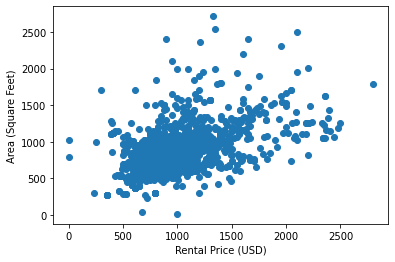

In [11]:
plt.scatter(x = housing.price, y = housing.sqfeet)
plt.xlabel('Rental Price (USD)')
plt.ylabel('Area (Square Feet)')
plt.show()

# Covariance

Covariance is a summary statistic that describs the strength of a linear relationship.

Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. A negative covariance indicates a larger value of one variable is associated with a smaller value of the other. A covariance of 0 indicates no linear relationship.

NumPy's covariance matrix with `cov()`:


  | variable 1 | variable 2
-- | -- | --
variable 1 | variance (variable 1) | covariance
variable 2 | covariance | variance (variable 2)


## Filter out nan

In [66]:
# Removed nan b/c covariance and correlation wouldn't calculate properly with them.
price_sqfeet_beds = housing[housing['price'].notnull() & housing['sqfeet'].notnull() & housing['beds'].notnull()]

print(np.cov(price_sqfeet_beds.price, price_sqfeet_beds.sqfeet))
print(np.cov(price_sqfeet_beds.sqfeet, price_sqfeet_beds.beds))
print('covariance', np.cov(price_sqfeet_beds.sqfeet, price_sqfeet_beds.beds)[1][0])

[[136259.75443723  57870.66023214]
 [ 57870.66023214  98574.54309544]]
[[9.85745431e+04 2.20096824e+02]
 [2.20096824e+02 7.49065148e-01]]
covariance 220.0968241536279


# Pearson Correlation (or simply correlation)

Same as covariance, but scales from -1 to 1.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

In [70]:
corr_price_sqfeet, p = pearsonr(price_sqfeet_beds.price, price_sqfeet_beds.sqfeet)
corr_sqfeet_beds, p = pearsonr(price_sqfeet_beds.sqfeet, price_sqfeet_beds.beds)
print(corr_price_sqfeet)
print(corr_sqfeet_beds)

0.49933527777065406
0.8099749619630896


There's a very high correlation between sqfeet and beds. Let's plot it to visualize it.


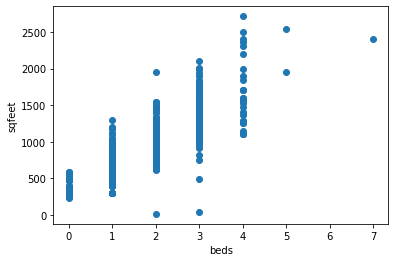

In [72]:
plt.scatter(x = housing.beds, y = housing.sqfeet)
plt.xlabel('beds')
plt.ylabel('sqfeet')
plt.show()